In [93]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install wordcloud
%pip install nltk
%pip install seaborn
%pip install transformers
%pip install torch
%pip install confusion-matrix
%pip install PySastrawi
%pip install datasets

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [94]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [95]:
import string
import matplotlib.pyplot as plt
import pandas as pd
import regex as re
import numpy as np
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from datasets import Dataset

from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel, BertTokenizer, AutoConfig
from transformers import TrainingArguments
from transformers import Trainer
from transformers import pipeline

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

In [96]:
data = pd.read_csv('/kaggle/input/product-review/PRDECT-ID.csv')

In [97]:
kamus_tidak_baku = pd.read_csv('/kaggle/input/product-review/kamusalay.csv', encoding='ISO-8859-1', header = None)
kamus_tb_dict = kamus_tidak_baku.set_index(0).to_dict('dict')[1]

In [98]:
data.index +=1
display(data)
data.columns

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
1,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
2,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
3,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
5,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy
...,...,...,...,...,...,...,...,...,...,...,...
5396,Household,PCK-01 Penjepit Barang / Pickup Tool Ver.1 Ala...,Jakarta Pusat,35000,4.9,1431,562,5,"Harga bersaing, barang sesuai pesanan. Saya na...",Positive,Love
5397,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,Beli ini krn Anak & Istri mau liburan di Jakar...,Positive,Love
5398,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,"pengemasan barang baik, kondisi barang jg utuh...",Positive,Happy
5399,Household,Ultrasonic Aroma Diffuser Humidifier Colorful ...,Jakarta Utara,99000,4.9,15529,4074,5,Mungil tapi bekerja dng baik. Dan murahh terja...,Positive,Happy


Index(['Category', 'Product Name', 'Location', 'Price', 'Overall Rating',
       'Number Sold', 'Total Review', 'Customer Rating', 'Customer Review',
       'Sentiment', 'Emotion'],
      dtype='object')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 1 to 5400
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         5400 non-null   object 
 1   Product Name     5400 non-null   object 
 2   Location         5400 non-null   object 
 3   Price            5400 non-null   int64  
 4   Overall Rating   5400 non-null   float64
 5   Number Sold      5400 non-null   int64  
 6   Total Review     5400 non-null   int64  
 7   Customer Rating  5400 non-null   int64  
 8   Customer Review  5400 non-null   object 
 9   Sentiment        5400 non-null   object 
 10  Emotion          5400 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 464.2+ KB


In [100]:
data.describe()

,Price,Overall Rating,Number Sold,Total Review,Customer Rating
count,5.400000e+03,5400.000000,5400.000000,5400.000000,5400.000000
mean,2.386961e+05,4.854389,15961.951852,2168.645556,3.087037
std,8.016337e+05,0.108259,74201.913338,2915.666035,1.766258
min,1.000000e+02,4.100000,9.000000,4.000000,1.000000
25%,2.000000e+04,4.800000,1630.000000,576.000000,1.000000
50%,5.990000e+04,4.900000,3794.500000,1192.000000,3.000000
75%,1.500000e+05,4.900000,9707.000000,2582.000000,5.000000
max,1.539900e+07,5.000000,1000000.000000,24500.000000,5.000000


In [101]:
data = pd.DataFrame(data)
data = data[['Customer Review', 'Emotion']]
data = data.rename(columns={"Customer Review":"text", "Emotion":"label"})
# data = data.rename(columns={"Emotion":"label"})
data

,text,label
1,Alhamdulillah berfungsi dengan baik. Packaging...,Happy
2,"barang bagus dan respon cepat, harga bersaing ...",Happy
3,"barang bagus, berfungsi dengan baik, seler ram...",Happy
4,bagus sesuai harapan penjual nya juga ramah. t...,Happy
5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Happy
...,...,...
5396,"Harga bersaing, barang sesuai pesanan. Saya na...",Love
5397,Beli ini krn Anak & Istri mau liburan di Jakar...,Love
5398,"pengemasan barang baik, kondisi barang jg utuh...",Happy
5399,Mungil tapi bekerja dng baik. Dan murahh terja...,Happy


In [102]:
import regex as re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def process_cleaning(text):

    # Replace emoji spesifik, numerik, url, non-word character by spacing
    text_cleaning_re = r"rt|url|[^\w\s]|'|nbsp|https\S+|[0-9]+"
    text_sub = re.sub(text_cleaning_re, ' ', str(text))

    # Remove strip / trims
    text_strip = text_sub.strip()

    # Remove punctutation / tanda baca
    translator = str.maketrans('', '', string.punctuation)
    text_no_punct = text_strip.translate(translator)

    # Lower Case
    text_lower = text_no_punct.casefold()

    # Tokenize
    text_token_stan = word_tokenize(text_lower)

    # Penggantian kata tidak baku / Normalization
    word_dict = []
    for word in text_token_stan:
        word_dict.append(kamus_tb_dict.get(word, word))
    tokens = " ".join(word_dict)

    # Tambah kata singkatan 
    more_stopword = ["sih","nya"]

    # menampung stopword ke variabel untuk jadi operator remove stopword
    stopword_user = StopWordRemoverFactory().get_stop_words() + more_stopword

    # Remove stopword
    token_new = word_tokenize(tokens)
    filter_new = []
    filter_new2 = [word.strip() for word in token_new]
    filter_new = [word for word in filter_new2 if not word in stopword_user]
    tokens = " ".join(filter_new)

    return tokens


In [103]:
import string

data['text'] = data['text'].apply(process_cleaning)
x_cleaned = data['text']
# data['cleaned'] = data['Customer Review'].apply(process_cleaning)
# x_cleaned = data['cleaned']
data.head(15)

,text,label
1,alhamdulillah berfungsi packaging aman respon ...,Happy
2,barang bagus respon cepat harga bersaing,Happy
3,barang bagus berfungsi seler ramah pengiriman ...,Happy
4,bagus sesuai harapan penjual ramah terima kasi...,Happy
5,barang bagus pengemasan aman berfungsi,Happy
6,barang bagus seller ramah,Happy
7,mantap paten joss,Happy
8,works fine respon seller cepat barang berfungs...,Happy
9,barang bagus segel utuh original berfungsi sel...,Happy
10,barang berfungsi bagus lampu birunya,Happy


In [104]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

print(Counter(data['label']))
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
print(Counter(data['label']))
y_replaced = data['label']
print(y_replaced)

# print(Counter(data['Emotion']))
# label_encoder = LabelEncoder()
# data['emotion'] = label_encoder.fit_transform(data['Emotion'])
# print(Counter(data['emotion']))
# y_replaced = data['emotion']
# print(y_replaced)

Counter({'Happy': 1770, 'Sadness': 1202, 'Fear': 920, 'Love': 809, 'Anger': 699})
Counter({2: 1770, 4: 1202, 1: 920, 3: 809, 0: 699})
1       2
2       2
3       2
4       2
5       2
       ..
5396    3
5397    3
5398    2
5399    2
5400    3
Name: label, Length: 5400, dtype: int64


In [105]:
data_new = pd.DataFrame(data[['text', 'label']])
# data_new = pd.DataFrame(data[['cleaned', 'emotion']])
# data_new = pd.DataFrame(data[['cleaned', 'label']])
data_new

,text,label
1,alhamdulillah berfungsi packaging aman respon ...,2
2,barang bagus respon cepat harga bersaing,2
3,barang bagus berfungsi seler ramah pengiriman ...,2
4,bagus sesuai harapan penjual ramah terima kasi...,2
5,barang bagus pengemasan aman berfungsi,2
...,...,...
5396,harga bersaing barang sesuai pesanan ekstra pa...,3
5397,beli anak istri liburan jaka cari ketemu toko ...,3
5398,pengemasan barang kondisi barang utuh cacat be...,2
5399,mungil murahh terjangkau pas kebutuhan,2


In [106]:
from sklearn.model_selection import train_test_split
train_test_ratio = 0.2

#train test split
data_train, data_test = train_test_split(data_new, test_size = train_test_ratio, random_state = 42)
print("Data Train Shape: ",data_train.shape)
print("Data Test Shape: ",data_test.shape)

print(data_train)

Data Train Shape:  (4320, 2)
Data Test Shape:  (1080, 2)
                                                   text  label
4149  barangnya terima pecah sudut posisi dilapis ga...      4
2810  masker bagus bahannya nyaman gampang kusut pes...      4
622   produk sesuai pengiriman cepat harganya ribu p...      2
567                   dendeng daging sapi asli campuran      1
1958                                    mantap pokoknya      3
...                                                 ...    ...
3773  teliti kiraan produk asli ex australia ex kalb...      1
5192  barangnya bagus tebal best deal kemarin mama s...      3
5227         kualitas produk bagus respon penjual ramah      2
5391  sip paket selamat semoga berfungsi terima kasi...      2
861                       barang sesuai pc liter kecewa      4

[4320 rows x 2 columns]


In [107]:
#prepare data train and validation
import pandas as pd
df_val = pd.DataFrame()

print(data_train.shape)
for row in data_new['label'].drop_duplicates():
  df_val = pd.concat([df_val, data_train.loc[data_train['label']==row]], ignore_index=True)
# for row in data_new['emotion'].drop_duplicates():
#   df_val = pd.concat([df_val, data_train.loc[data_train['emotion']==row]], ignore_index=True)

df_train = df_val
print(df_train.shape)
print(df_train)

(4320, 2)
(4320, 2)
                                                   text  label
0     produk sesuai pengiriman cepat harganya ribu p...      2
1     mantap murah terima kasih kak terima kasih aba...      2
2          respon cepat packing oke rapi orderan sesuai      2
3     barang sesuai ukuran mesin cuci tabung pas ter...      2
4     aplikator mudah dipakai desainnya lucu warnany...      2
...                                                 ...    ...
4315                                              nyala      1
4316  beli celana hitam grey merah muda ukuran beda ...      1
4317                            bangkai mati semuanyaaa      1
4318  butuh cepat kirim respon jual amanah brather j...      1
4319  teliti kiraan produk asli ex australia ex kalb...      1

[4320 rows x 2 columns]


In [108]:
data_train

,text,label
4149,barangnya terima pecah sudut posisi dilapis ga...,4
2810,masker bagus bahannya nyaman gampang kusut pes...,4
622,produk sesuai pengiriman cepat harganya ribu p...,2
567,dendeng daging sapi asli campuran,1
1958,mantap pokoknya,3
...,...,...
3773,teliti kiraan produk asli ex australia ex kalb...,1
5192,barangnya bagus tebal best deal kemarin mama s...,3
5227,kualitas produk bagus respon penjual ramah,2
5391,sip paket selamat semoga berfungsi terima kasi...,2


In [109]:
#convert dataframe to dataset type
dataset_train = Dataset.from_dict(data_train)
dataset_test =  Dataset.from_dict(data_test)
print("Dataset Train : ",dataset_train)
print("Dataset Test : ",dataset_test)

Dataset Train :  Dataset({
    features: ['text', 'label'],
    num_rows: 4320
})
Dataset Test :  Dataset({
    features: ['text', 'label'],
    num_rows: 1080
})


In [110]:
#konfigurasi penamaan label sesuai dengan kelas emoion yang digunakan
id2label = {
    "0": "Anger",
    "1": "Fear",
    "2": "Happy",
    "3": "Love",
    "4": "Sadness"
  }
label2id= {
    "Anger": 0,
    "Fear": 1,
    "Happy": 2,
    "Love": 3,
    "Sadness": 4
  }

In [111]:
from transformers import AutoConfig
config = AutoConfig.from_pretrained("indolem/indobertweet-base-uncased")
config.label2id = label2id
config.id2label = id2label
config._num_labels = len(label2id)


In [112]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments
from transformers import Trainer
tokenizer = AutoTokenizer.from_pretrained("indolem/indobertweet-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained("indolem/indobertweet-base-uncased",config=config)
model.config

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertConfig {
  "_name_or_path": "indolem/indobertweet-base-uncased",
  "_num_labels": 5,
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_ids": 0,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Anger",
    "1": "Fear",
    "2": "Happy",
    "3": "Love",
    "4": "Sadness"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Anger": 0,
    "Fear": 1,
    "Happy": 2,
    "Love": 3,
    "Sadness": 4
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 31923
}

In [113]:
# def tokenize(examples):
#     return tokenizer(examples["cleaned"], padding="max_length", truncation=True, max_length=512)

def tokenize(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

In [114]:
dataset_train = dataset_train.map(tokenize, batched=True)
dataset_test = dataset_test.map(tokenize, batched=True)

Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/1080 [00:00<?, ? examples/s]

In [115]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
}

In [116]:
training_args = TrainingArguments("test_trainer", eval_strategy="epoch",per_device_train_batch_size=8,num_train_epochs=8,learning_rate=2e-5,logging_steps=1, report_to="none")
trainer = Trainer(model=model.cuda(), args=training_args, train_dataset=dataset_train, eval_dataset=dataset_test,compute_metrics=compute_metrics)
trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.673000,0.931555,0.622222,0.618654,0.565993,0.576592
2,0.429900,0.870168,0.650926,0.642950,0.605662,0.611872
3,0.573800,0.875549,0.652778,0.623045,0.618067,0.619729
4,0.343000,0.969058,0.632407,0.612941,0.613985,0.607908
5,0.263400,1.042513,0.629630,0.606100,0.605237,0.600853
6,0.080600,1.102846,0.636111,0.609288,0.592212,0.597956
7,0.410700,1.172096,0.629630,0.602177,0.601723,0.599201
8,0.430300,1.189184,0.635185,0.605461,0.602952,0.602958


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

TrainOutput(global_step=2160, training_loss=0.5603518721871767, metrics={'train_runtime': 2103.1801, 'train_samples_per_second': 16.432, 'train_steps_per_second': 1.027, 'total_flos': 9093363003555840.0, 'train_loss': 0.5603518721871767, 'epoch': 8.0})

In [117]:
# model.save_pretrained("model")
# tokenizer.save_pretrained("model")

In [118]:
predicted_review = trainer.predict(dataset_test)
raw_pred, _, _ = predicted_review
predict_class = np.argmax(raw_pred, axis=1)


/usr/local/lib/python3.10/dist-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Confusion Matrix
[[277   9   9  59   2]
 [ 28 147  49   0  29]
 [ 12  33  86   2  26]
 [ 49   2   5 109   2]
 [  5  40  32   1  67]]


Accuracy: 63.51851851851852
Precision: 60.54610836008456
Recall: 60.295232701299554
F1-Score: 60.295829834640216


              precision    recall  f1-score   support

           2     0.7466    0.7781    0.7620       356
           4     0.6364    0.5810    0.6074       253
           1     0.4751    0.5409    0.5059       159
           3     0.6374    0.6527    0.6450       167
           0     0.5317    0.4621    0.4945       145

    accuracy                         0.6352      1080
   macro avg     0.6055    0.6030    0.6030      1080
weighted avg     0.6351    0.6352    0.6341      1080



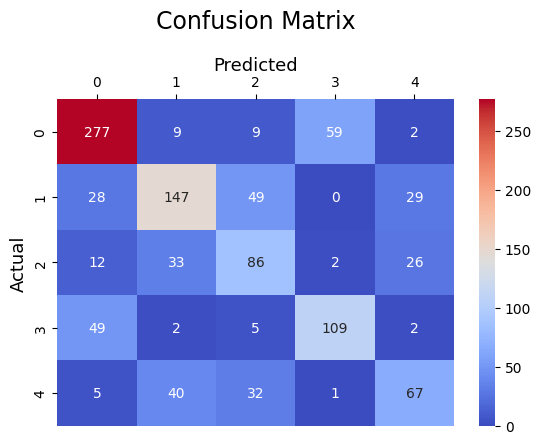

In [119]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def findMetrics(test, pred):
    labels = test.unique()
    cm = confusion_matrix(test, pred, labels=labels)
    print("Confusion Matrix")
    print(cm)

    print("\n")
    print("Accuracy:", accuracy_score(test, pred) * 100)
    print("Precision:", precision_score(test, pred, average='macro') * 100)
    print("Recall:", recall_score(test, pred, average='macro') * 100)
    print("F1-Score:", f1_score(test, pred, average='macro') * 100)
    print("\n")
    print(classification_report(test, pred, labels=labels, digits=4))

    sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm')
    plt.title('Confusion Matrix', fontsize=17, pad=20)
    plt.gca().xaxis.set_label_position('top')
    plt.ylabel('Actual', fontsize=13)
    plt.xlabel('Predicted', fontsize=13)
    plt.gca().xaxis.tick_top()

    plt.gca().figure.subplots_adjust(bottom=0.2)
    plt.show()

findMetrics(data_test['label'], predict_class)
